# Local testing for Vertex Cover algorithms

Fix for NotImplementedError for notebook in Python3.8
https://stackoverflow.com/questions/58422817/jupyter-notebook-with-python-3-8-notimplementederror

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.approximation.vertex_cover import min_weighted_vertex_cover
from vertex_cover import *

## Generating graphs

In [2]:
# Generate classic small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [3]:
# Generate social networks
florentine = nx.generators.social.florentine_families_graph()

In [4]:
# Constructively generate classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [5]:
# Generate stochastic graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

NetworkX random graph generators worth testing with:
- Community
- Social Networks
- Random Graphs

## Drawing graphs

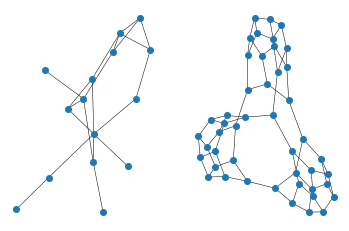

In [6]:
options = {
#     'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.5,
}

plt.subplot(121)
nx.draw(florentine, **options)
plt.subplot(122)
nx.draw(tutte, **options)

## Testing VC

In [12]:
def print_vc(graph, vc):
    if vc:
        print(vc)
        print(f"Size: {len(vc)}")
        print(f"VC? : {is_vertex_cover(graph, vc)}")
    else:
        print("None")

### Validity

In [8]:
graph = florentine
k = 12

#### Kernelization

In [13]:
"""
vertex_cover_kernelization
"""

vc_k = vertex_cover_kernelization(graph, k)
print_vc(graph, vc_k)

{'Albizzi', 'Peruzzi', 'Strozzi', 'Medici', 'Guadagni', 'Castellani', 'Ridolfi', 'Salviati'}
Size: 8
VC? : True
VC?2: True


#### Branching

In [14]:
"""
vertex_cover_branching_dfs_recursive
vertex_cover_branching_dfs_iterative
vertex_cover_branching_bfs
"""

vc_b_dfs_r = vertex_cover_branching_dfs_recursive(graph, k)
print_vc(graph, vc_b_dfs_r)

vc_b_dfs_i = vertex_cover_branching_dfs_iterative(graph, k)
print_vc(graph, vc_b_dfs_i)

vc_b_bfs = vertex_cover_branching_bfs(graph, k)
print_vc(graph, vc_b_bfs)

{'Bischeri', 'Albizzi', 'Peruzzi', 'Strozzi', 'Acciaiuoli', 'Medici', 'Guadagni', 'Castellani', 'Tornabuoni', 'Ridolfi', 'Salviati'}
Size: 11
VC? : True
VC?2: True
{'Bischeri', 'Albizzi', 'Peruzzi', 'Strozzi', 'Acciaiuoli', 'Medici', 'Guadagni', 'Castellani', 'Tornabuoni', 'Ridolfi', 'Salviati'}
Size: 11
VC? : True
VC?2: True
{'Bischeri', 'Albizzi', 'Peruzzi', 'Strozzi', 'Acciaiuoli', 'Medici', 'Guadagni', 'Castellani', 'Tornabuoni', 'Ridolfi', 'Salviati'}
Size: 11
VC? : True
VC?2: True


### Runtime Analysis

In [11]:
def timeit(repeat, number, function, *args):
    


%timeit vertex_cover_brute_force(florentine, k)
%timeit vertex_cover_kernelization(florentine, k)
%timeit vertex_cover_branching_dfs_recursive(florentine, k)
%timeit vertex_cover_branching_dfs_iterative(florentine, k)
%timeit vertex_cover_branching_bfs(florentine, k)

IndentationError: expected an indented block (<ipython-input-11-baa83a85bd0b>, line 5)